In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

In [2]:
wd = "~/Desktop/kaggle/Intacart"
df_order_products_train = pd.read_csv("{wd}/Data/order_products__train.csv".format(wd = wd))
df_order_products_prior = pd.read_csv("{wd}/Data/order_products__prior.csv".format(wd = wd))
df_orders = pd.read_csv("{wd}/Data/orders.csv".format(wd = wd))
df_products = pd.read_csv("{wd}/Data/products.csv".format(wd = wd))
df_aisles = pd.read_csv("{wd}/Data/aisles.csv".format(wd = wd))
df_departments = pd.read_csv("{wd}/Data/departments.csv".format(wd = wd))

In [13]:
pd.set_option('max_colwidth', 20)

## df_aisles
There are 134 aisles in total.

In [9]:
print df_aisles.head(n=10)
df_aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


## df_products
There are 49,688 products in total.

In [14]:
print df_products.head(n = 10)
print df_products.info()

   product_id         product_name  aisle_id  department_id
0           1  Chocolate Sandwi...        61             19
1           2     All-Seasons Salt       104             13
2           3  Robust Golden Un...        94              7
3           4  Smart Ones Class...        38              1
4           5  Green Chile Anyt...         5             13
5           6         Dry Nose Oil        11             11
6           7  Pure Coconut Wat...        98              7
7           8  Cut Russet Potat...       116              1
8           9  Light Strawberry...       120             16
9          10  Sparkling Orange...       115              7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


## df_deparments
There are 21 departments in total.

In [16]:
print df_departments.head(n=10)
print df_departments.info()

   department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 408.0+ bytes
None


### Department and Aisle count

In [146]:
df_aisle_department = df_products.loc[:,['aisle_id','department_id']].drop_duplicates()
df_aisle_department = df_departments.merge(df_aisle_department, how='left', on = 'department_id')
s = df_aisle_department.groupby('department_id').size()
df_department_cnt = pd.DataFrame({'aisle_count':s.values}).set_index(s.index)
df_department_cnt.merge(df_departments.set_index('department_id'), left_index= True, right_index=True)[['department', 'aisle_count']]

,department,aisle_count
department_id,,
1,frozen,11
2,other,1
3,bakery,5
4,produce,5
5,alcohol,5
6,international,4
7,beverages,8
8,pets,2
9,dry goods pasta,5


## df_order_products_train
There are 1,384,617 entries training data set.

There are 131,209 unique orders in training data set.

In [153]:
print df_order_products_train.head(n=10)
print df_order_products_train.info()

n_train_orders = df_order_products_train.groupby('order_id').size().shape[0]
print '\nNumber of unique orders in training set: {n_order} \n'.format(n_order = n_train_orders)

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
5         1       13176                  6          0
6         1       47209                  7          0
7         1       22035                  8          1
8        36       39612                  1          0
9        36       19660                  2          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB
None

Number of unique orders in training set: 131209 



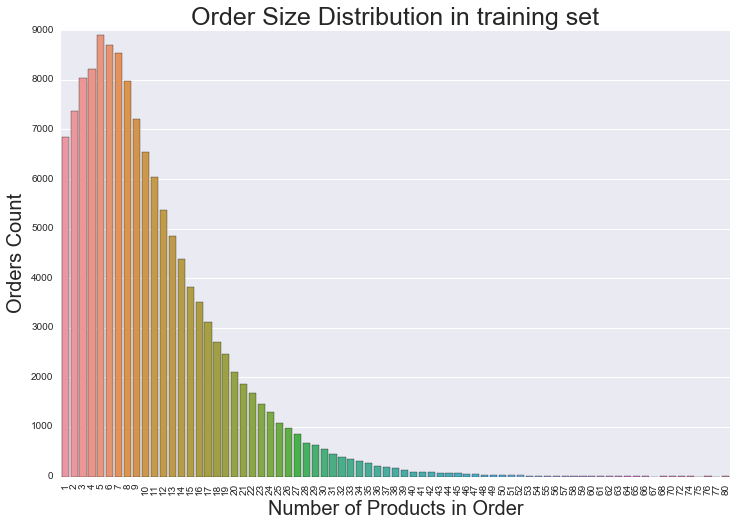

In [180]:
train_order_size = df_order_products_train.groupby('order_id').size().value_counts()

plt.figure(figsize=(12,8))
sns.barplot(train_order_size.index, train_order_size.values)
plt.title('Order Size Distribution in training set', fontsize = 25)
plt.xlabel('Number of Products in Order', fontsize = 20)
plt.ylabel('Orders Count', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.show()

## df_oder_products_prior
There are 32,434,489 entries in prior data set.

There are 3,214,874 unique orders in prior data set.

In [179]:
print df_order_products_prior.head(n=10)
print df_order_products_prior.info()

n_prior_orders = df_order_products_prior.groupby('order_id').size().shape[0]
print '\nNumber of unique orders in prior set: {n_order} \n'.format(n_order = n_prior_orders)

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
5         2       17794                  6          1
6         2       40141                  7          1
7         2        1819                  8          1
8         2       43668                  9          0
9         3       33754                  1          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB
None

Number of unique orders in prior set: 3214874 



## df_orders

In [11]:
print df_orders.head(n=10)
print "\nShape of df_orders is: {shape}.\n".format(shape = df_orders.shape)

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   
5   3367565        1    prior             6          2                  7   
6    550135        1    prior             7          1                  9   
7   3108588        1    prior             8          1                 14   
8   2295261        1    prior             9          1                 16   
9   2550362        1    prior            10          4                  8   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4           

## Test vs. Train vs. Previous
We would like to know the size of training and previous order information vs. the size of testing order information.

In [12]:
print "Test orders count: {num_test}\n".format \
      (num_test = df_orders[df_orders.eval_set == 'test'].shape[0])
    
print "Train orders count: {num_train}\n".format \
      (num_train = df_orders[df_orders.eval_set == 'train'].shape[0])
    
print "Previous orders count: {num_previous}\n".format \
      (num_previous = df_orders[df_orders.eval_set == 'prior'].shape[0])

Test orders count: 75000

Train orders count: 131209

Previous orders count: 3214874



## Finding 1. Weekly-based recurrent orders

1. First, there are noticable peaks on the 'days_since_prior_order' feature of df_orders when it equals 7, 14, 21, 28. 
2. Second, these Weekly-based recurrent orders tend to have reordered products much more than other recurrent orders. 


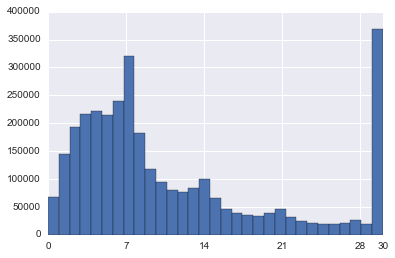

In [30]:
# histgram of days_since_prior_order
plt.hist(df_orders.days_since_prior_order.dropna(), bins = 31)
plt.xticks([0,7,14,21,28,30], ['0', '7', '14', '21', '28', '30'])
plt.show()

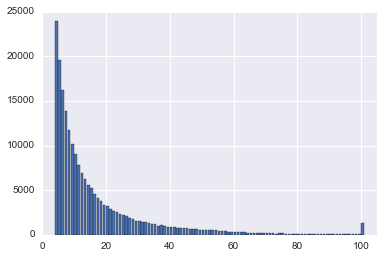

In [181]:
count_userid_occurence = {}
for phrase, count in collections.Counter(df_orders.user_id).items():
    try: 
        count_userid_occurence[count] += 1
    except:
        count_userid_occurence[count] = 0

plt.bar(count_userid_occurence.keys(), count_userid_occurence.values())
plt.xlim([0,105])
plt.show()

In [50]:
order_id_after_weeks = df_orders[(df_orders.eval_set == 'train') & \
                                 (df_orders.days_since_prior_order.isin([7,14,21,28])) \
                                ].order_id

for item, counts in collections.Counter(\
                                     df_order_products_train[df_order_products_train.order_id.isin(order_id_after_weeks)]\
                                     .reordered\
                                     ).items():
    if item:
        print "Number of reordered products: {num}".format(num = counts)
    else:
        print "Number of non-reordered products: {num}".format(num = counts)
        
for item, counts in collections.Counter(\
                                     df_order_products_train[-(df_order_products_train.order_id.isin(order_id_after_weeks))]\
                                     .reordered\
                                     ).items():
    if item:
        print "Number of reordered products: {num}".format(num = counts)
    else:
        print "Number of non-reordered products: {num}".format(num = counts)

Number of non-reordered products: 70058
Number of reordered products: 138829
Number of non-reordered products: 485735
Number of reordered products: 689995
